In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
def lineal(x):
    return x

def cuadrado(x):
    return x ** 2

def cubo(x):
    return x ** 3

In [3]:
def integra_mc_bucles(fun, a, b, num_puntos = 10000):
    
    # COMIENZA EL TIEMPO
    tic = time.process_time()
    n_debajo = 0
    
    # GENERAMOS EL EJE X DE LOS PUNTOS
    puntos = np.random.uniform(a, b, num_puntos)
    
    # BUSCAMOS EL MAXIMO M DEL EJE X
    M = np.max(fun(puntos))
    
    #linea = np.linspace(a, b, 50)
    #plt.plot(linea, fun(linea), c = 'blue')

    # ANIADIMOS EL EJE 'Y' AL ARRAY
    puntos = np.array((puntos, np.random.uniform(0, M, num_puntos)))
    
    #plt.scatter(puntos[0], puntos[1], c = 'red', marker='x')

    
    # RECORREMOS CON UN BUCLE EL EJE 'Y' DE LOS PUNTOS
    #  Y COMPROBAMOS SI ESTAN POR DEBAJO DE LA FUNCION
    for i in range(num_puntos):
        if puntos[1, i] < fun(puntos[0, i]):
            n_debajo += 1
    
    # APLICAMOS LA FORMULA
    I = (n_debajo / num_puntos) * (b - a) * M
    
    #TERMINA EL TIEMPO
    toc = time.process_time()
    
    #print("El método propio de bucles ha calculado:", I)
    
    return((toc - tic) * 1000)

In [4]:
def integra_mc_vectorizado(fun, a, b, num_puntos=10000):
    
    # COMIENZA EL TIEMPO
    tic = time.process_time()
    n_debajo = 0
    
    # GENERAMOS EL EJE X DE LOS PUNTOS
    puntos = np.random.uniform(a, b, num_puntos)
    
    # BUSCAMOS EL MAXIMO M DEL EJE X
    M = np.max(fun(puntos))
    
    # ANIADIMOS EL EJE 'Y' AL ARRAY
    puntos = np.array((puntos, np.random.uniform(0, M, num_puntos)))
    
    # COMPARAMOS SI VECTOR 'Y' ESTA POR DEBAJO DE LA FUNCION,
    # DEVOLVEMOS LOS BOOLEANOS Y LOS CONTAMOS, TODO ELLO VECTORIZADO
    n_debajo = np.sum(puntos[1, :] < fun(puntos[0, :]))
    
    # APLICAMOS LA FORMULA
    I = (n_debajo / num_puntos) * (b - a) * M
    
    #TERMINA EL TIEMPO
    toc = time.process_time()
    
    #print("El método propio de la vectorización ha calculado:", I)
    
    return((toc - tic) * 1000)

In [5]:
print("El tiempo de los bucles es: {} milisegundos\n".format(integra_mc_bucles(cubo, 0, 4, 100000)))
print("El tiempo de la vectorización es: {} milisegundos\n".format(integra_mc_vectorizado(cubo, 0, 4, 100000)))
print("El método de scipy ha calculado: {}".format(integrate.quad(cubo, 0, 4)[0]))

El tiempo de los bucles es: 93.75 milisegundos

El tiempo de la vectorización es: 0.0 milisegundos

El método de scipy ha calculado: 64.0


In [13]:
def compara_tiempos(fun, a, b, num_puntos=10000):
    
    # Tiempos acumulados
    acumulado_bucles = 0
    acumulado_vect = 0
    
    # Veces a recorrer el bucle
    sizes = np.linspace(a, b, 20)

    plt.figure()

    # Sumamos los tiempos (No los metemos en un array)
    # Dibujamos el punto en la grafica
    for i in sizes:
        acumulado_bucles += integra_mc_bucles(fun, a, b, num_puntos)
        plt.plot(i, acumulado_bucles, c = 'red', marker='o')

        acumulado_vect += integra_mc_vectorizado(fun, a, b, num_puntos)
        plt.scatter(i, acumulado_vect, c = 'blue', marker='o')

    
    # Mostramos la grafica
    plt.show()
    
    return (acumulado_bucles / acumulado_vect)


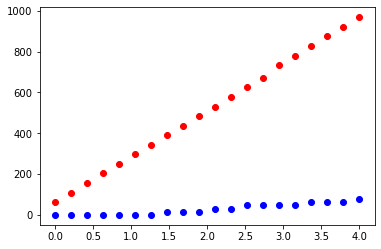

La vectorización en la función lineal es: x12.40 veces más eficiente




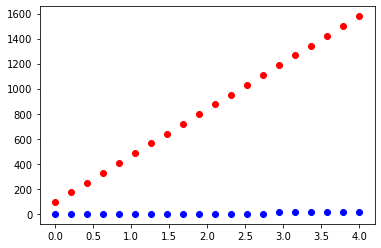

La vectorización en la función cuadrado es: x101.00 veces más eficiente




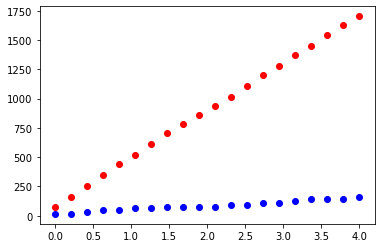

La vectorización en la función cubo es: x10.90 veces más eficiente




In [10]:
print("La vectorización en la función lineal es: x{:.2f} veces más eficiente\n\n".format(compara_tiempos(lineal, 0, 4, 100000)))
print("La vectorización en la función cuadrado es: x{:.2f} veces más eficiente\n\n".format(compara_tiempos(cuadrado, 0, 4, 100000)))
print("La vectorización en la función cubo es: x{:.2f} veces más eficiente\n\n".format(compara_tiempos(cubo, 0, 4, 100000)))
